In [ ]:
import numpy as np, random, operator, pandas as pd
import matplotlib.pyplot as plt


def initialize_population(size,Number_of_city):
    population = []
    for i in range(0,size):
        population.append(create_new_chromosome(Number_of_city))
    return population

In [ ]:
def distance(i,j):
    x=np.sqrt((i[0]-j[0])**2 + (i[1]-j[1])**2)
    return x

In [ ]:
def fitness(route,CityList):
    score=0
    for i in range(1,len(route)):
        k=int(route[i-1])
        l=int(route[i])
        score = score + distance(CityList[k],CityList[l])
    return score

In [ ]:
def create_new_chromosome(Number_of_city):
    pop=set(np.arange(Number_of_city,dtype=int))
    route=list(random.sample(pop,Number_of_city))
    return route

In [ ]:
def crossover(a,b):
    child=[]
    childA=[]
    childB=[]
    geneA=int(random.random()* len(a))
    geneB=int(random.random()* len(a))
    start_gene=min(geneA,geneB)
    end_gene=max(geneA,geneB)
    for i in range(start_gene,end_gene):
        childA.append(a[i])
    childB=[item for item in a if item not in childA]
    child=childA+childB
    return child

In [ ]:
def mutate(route,probablity):
    route=np.array(route)
    for swaping_p in range(len(route)):
        if(random.random() < probablity):
            swapedWith = np.random.randint(0,len(route))
            temp1=route[swaping_p]
            temp2=route[swapedWith]
            route[swapedWith]=temp1
            route[swaping_p]=temp2
    return route

In [ ]:
def selection(popRanked, eliteSize):
    selectionResults=[]
    result=[]
    for i in popRanked:
        result.append(i[0])
    for i in range(0,eliteSize):
        selectionResults.append(result[i])
    return selectionResults



In [ ]:
def rankRoutes(population,City_List):
    fitnessResults = {}
    for i in range(0,len(population)):
        fitnessResults[i] = fitness(population[i],City_List)
    return sorted(fitnessResults.items(), key = operator.itemgetter(1), reverse = False)

def breedPopulation(mating_pool):
    children=[]
    for i in range(len(mating_pool)-1):
            children.append(crossover(mating_pool[i],mating_pool[i+1]))
    return children

def mutatePopulation(children,mutation_rate):
    new_generation=[]
    for i in children:
        muated_child=mutate(i,mutation_rate)
        new_generation.append(muated_child)
    return new_generation

def matingPool(population, selectionResults):
    matingpool = []
    for i in range(0, len(selectionResults)):
        index = selectionResults[i]
        matingpool.append(population[index])
    return matingpool

def next_generation(City_List,current_population,mutation_rate,elite_size):
    population_rank=rankRoutes(current_population,City_List)
    selection_result=selection(population_rank,elite_size)
    mating_pool=matingPool(current_population,selection_result)
    children=breedPopulation(mating_pool)
    next_generation=mutatePopulation(children,mutation_rate)
    return next_generation



Distance between cities with co-ordinates : 
(199, 10)  and  (38, 153)  is  215.3369452741447
(38, 153)  and  (55, 67)  is  87.66413177577246
(55, 67)  and  (176, 110)  is  128.41339493993607
(176, 110)  and  (58, 129)  is  119.5198728245642
(58, 129)  and  (101, 143)  is  45.221676218380054
(101, 143)  and  (70, 83)  is  67.53517601961218
(70, 83)  and  (124, 176)  is  107.54068997360952
(124, 176)  and  (145, 186)  is  23.259406699226016
(145, 186)  and  (56, 21)  is  187.47266467407988


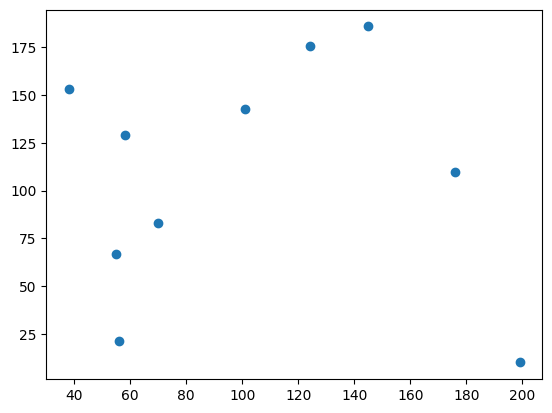

<ipython-input-4-caf022addfac>:3: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  route=list(random.sample(pop,Number_of_city))


[[0, 7, 8, 5, 2, 6, 4, 1, 9, 3], [8, 1, 9, 5, 0, 6, 7, 4, 2, 3], [5, 1, 7, 9, 4, 2, 3, 0, 6, 8], [0, 5, 6, 4, 1, 8, 9, 2, 7, 3], [6, 0, 5, 8, 9, 3, 7, 2, 1, 4], [4, 6, 7, 5, 2, 8, 1, 0, 9, 3], [9, 5, 4, 7, 1, 3, 2, 8, 6, 0], [4, 3, 1, 0, 7, 9, 5, 6, 2, 8], [6, 1, 3, 7, 5, 8, 0, 2, 9, 4], [3, 1, 5, 6, 4, 7, 9, 0, 8, 2]]
[739.1111456678519]
Best Route :[8, 0, 2, 9, 6, 1, 3, 7, 5, 4, 8] 
best route distance 839.5220663196426


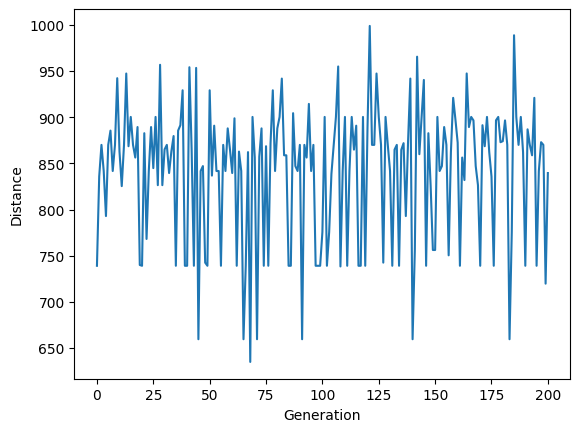

In [ ]:
def genetic_algorithm(City_List,size_population=10,elite_size=5,mutation_Rate=0.01,generation=200):
    pop=[]
    progress = []
    Number_of_cities=len(City_List)
    population=initialize_population(size_population,Number_of_cities)
    print(population)
    progress.append(rankRoutes(population,City_List)[0][1])
    population[0].append(population[0][0])
    for i in range(0,generation):
        pop = next_generation(City_List,population,mutation_Rate,elite_size)
        progress.append(rankRoutes(pop,City_List)[0][1])
    rank_=rankRoutes(pop,City_List)[0]
    x=list(pop[rank_[0]])
    x.append(pop[rank_[0]][0])
    print(f"Best Route :{x} ")
    print(f"best route distance {rank_[1]}")
    plt.plot(progress)
    plt.ylabel('Distance')
    plt.xlabel('Generation')
    plt.show()
    return rank_, pop

cityList = []
print("Distance between cities with co-ordinates : ")
for i in range(0,10):
    x=int(random.random() * 200)
    y=int(random.random() * 200)
    cityList.append((x,y))
for i in range(1,len(cityList)):
    print(cityList[i-1]," and ",cityList[i]," is ",distance(cityList[i-1],cityList[i]))

x_axis=[]
y_axis=[]
for i in cityList:
    x_axis.append(i[0])
    y_axis.append(i[1])

plt.scatter(x_axis,y_axis)
plt.show()
rank_,pop=genetic_algorithm(City_List=cityList)


